-------------------------------------
# Predicción del precio de automóviles
-------------------------------------

<p><span style="color:blue;">Autor: Arturo Parra P.</span></p>
<p><span style="color:purple;">Fecha: 13/10/2025</span></p>
<p><span style="color:golden;">Dataset: Automobile</span></p>
<p><span style="color:silver;">Objetivo: Crear un modelo de aprendizaje automático, basándose en las características de un automóvil, prediga su valor de mercado.   
El modelo se entrenará con la información del dataset "Automobile".</span></p>





______________________________
# **Sección: Librerías**

In [1]:
import pandas as pd # Para manejo y manipulación de datos
import numpy as np # Para operaciones numéricas y arreglos

# Selección y evaluación de modelos de machine learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

# Preprocesamiento de datos
from scipy.stats import zscore # Para el cálculo de la puntuación z
from sklearn.pipeline import Pipeline # Para crear pipelines de procesamiento
from sklearn.compose import ColumnTransformer # Para aplicar transformaciones a columnas específicas
from sklearn.impute import SimpleImputer # Para imputación de valores faltantes
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Para codificación one-hot y escalado de características

# Modelos de machine learning
from sklearn.linear_model import LinearRegression # Modelo de regresión lineal
from sklearn.neighbors import KNeighborsRegressor # Modelo de vecinos más cercanos para regresión
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor # Modelos de ensamble para regresión
import xgboost as xgb # Modelo de Gradient Boosting

# Métricas de evaluación de modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Métricas de error y R-cuadrado

# Visualización de datos
import matplotlib.pyplot as plt # Para crear gráficos
from matplotlib.pyplot import figure # Para configurar figuras de matplotlib
import seaborn as sns # Para visualizaciones estadísticas atractivas

---------------------------
# **Sección: Base de datos.**

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data" #! Enlace de referencia para descargar la base de datos

# Definición de los nombres de las columnas, ya que el archivo CSV no tiene encabezados
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Carga del archivo CSV en un DataFrame de pandas, utilizando la URL, los nombres de las columnas definidos y reemplazando '?' por valores NaN
df_automobile = pd.read_csv(url, names=cols, na_values='?')

-----------------------------------------------
# **Sección: Analisís de Datos**

## **Pre-Procesamiento Datos**:

In [3]:
# Mostrar un máximo de 99 columnas al visualizar el DataFrame
pd.options.display.max_columns = 99
# Dimensiones del DataFrame (número de filas y columnas)
print("Dimensiones dataset:", df_automobile.shape)
# Mostrar las primeras 5 filas del DataFrame
print("<\n\nPrimeras 5 filas dataset:")
display(df_automobile.head(5))

Dimensiones dataset: (205, 26)
<

Primeras 5 filas dataset:


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
print("\nTipos de datos del DataFrame:", df_automobile.dtypes, sep='\n\n')


Tipos de datos del DataFrame:

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


Tras cargar el dataset “Automobile”, lo primero que hice fue definir correctamente los nombres de las columnas, ya que el archivo original no los incluía. Posteriormente, reemplacé los símbolos ‘?’ por valores NaN con el propósito de manejar de forma adecuada los datos faltantes durante la fase de limpieza y análisis.

Al explorar la estructura general, confirmé que el dataset contiene 205 registros y 26 variables, un tamaño que considero adecuado para realizar análisis exploratorios y modelado predictivo sin comprometer el rendimiento computacional. Cada fila representa un automóvil único, y las columnas describen una amplia variedad de características técnicas, estructurales, de diseño y de desempeño, además del precio final, que será la variable objetivo de mi estudio.

Durante la inspección de las primeras filas, noté la presencia de valores ausentes, particularmente en la columna ‘normalized-losses’. También observé una combinación de variables numéricas y categóricas. Entre las numéricas se incluyen tanto enteros (int64) como flotantes (float64), y destacan ‘normalized-losses’, ‘bore’, ‘stroke’, ‘horsepower’, ‘peak-rpm’ y ‘price’, que pueden contener valores decimales o NaN. Las variables de tipo object, en cambio, son categóricas y almacenan texto, por lo que requerirán procesos de codificación como One-Hot Encoding o Label Encoding antes del modelado.

Clasifiqué las variables en cuatro grupos principales:

Datos técnicos: engine-size, horsepower, compression-ratio, peak-rpm, city-mpg, highway-mpg.

Atributos de diseño: body-style, num-of-doors, drive-wheels, engine-location.

Datos categóricos clave: make (marca), fuel-type, aspiration.

Variable objetivo: price, de tipo continua, lo que confirma que se trata de un problema de regresión.

In [5]:
# Calcular la cantidad de valores nulos en cada columna
cant_valores_nulos = df_automobile.isnull().sum()
# Calcular el porcentaje de valores nulos en cada columna, redondeando a 2 decimales
porcentaje_nulos = (df_automobile.isnull().mean() * 100).round(2)

# Crear un nuevo DataFrame para mostrar los valores nulos y su porcentaje
df_Nulos = pd.DataFrame({
    "valores nulos:" : cant_valores_nulos,
    "Porcentaje:" : porcentaje_nulos
})

# Imprimir el DataFrame de valores nulos
print("\n DataFrame de valores nulos:", df_Nulos, sep="\n\n")


 DataFrame de valores nulos:

                   valores nulos:  Porcentaje:
symboling                       0         0.00
normalized-losses              41        20.00
make                            0         0.00
fuel-type                       0         0.00
aspiration                      0         0.00
num-of-doors                    2         0.98
body-style                      0         0.00
drive-wheels                    0         0.00
engine-location                 0         0.00
wheel-base                      0         0.00
length                          0         0.00
width                           0         0.00
height                          0         0.00
curb-weight                     0         0.00
engine-type                     0         0.00
num-of-cylinders                0         0.00
engine-size                     0         0.00
fuel-system                     0         0.00
bore                            4         1.95
stroke                       

El análisis de valores nulos del dataset “Automobile” revela que la columna ‘normalized-losses’ presenta la mayor proporción de datos faltantes, con 41 valores nulos (20%). Otras columnas como ‘bore’, ‘stroke’, ‘horsepower’, ‘peak-rpm’, ‘num-of-doors’ y ‘price’ presentan porcentajes bajos de valores faltantes (entre 0.98% y 1.95%), en cambio, la mayoría de las columnas no presenta valores nulos, lo que indica una buena calidad general del conjunto de datos. Este diagnóstico es esencial dentro del preprocesamiento, ya que permite planificar estrategias de imputación diferenciadas y asegurar la consistencia del dataset antes del análisis exploratorio y el modelado predictivo, especialmente considerando que ‘price’ es la variable objetivo y su tratamiento debe realizarse con precaución para no sesgar los resultados.

In [6]:
# Muestra estadísticas rapida y descriptivas del DataFrame, incluyendo count, mean, std, min, max, 25%, 50% (median), y 75% percentiles para columnas numéricas.
df_automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


El análisis estadístico obtenido con df_automobile.describe() muestra que el dataset “Automobile” contiene 205 registros y una combinación de variables numéricas que describen dimensiones físicas, desempeño y precio de los vehículos, aunque algunas presentan valores faltantes como ‘normalized-losses’, ‘bore’, ‘stroke’, ‘horsepower’, ‘peak-rpm’ y ‘price’. La variable objetivo ‘price’ presenta una alta dispersión, con valores entre 5,118 y 45,400, una media de 13,207 y una desviación estándar de 7,947, lo que evidencia gran variabilidad en el costo de los automóviles. Las características técnicas muestran también amplios rangos: el peso (‘curb-weight’) varía entre 1,488 y 4,066, el tamaño del motor (‘engine-size’) entre 61 y 326, y la potencia (‘horsepower’) entre 48 y 288, reflejando la diversidad de modelos desde compactos hasta deportivos. En términos de consumo, el rendimiento promedio es de 25.2 mpg en ciudad y 30.7 mpg en carretera, indicando eficiencia moderada en la mayoría de vehículos. En conjunto, las estadísticas describen un conjunto de datos heterogéneo que integra autos de distintos segmentos y configuraciones, lo que brinda una base sólida para el análisis exploratorio y la construcción de modelos predictivos sobre el precio.

 **Analisís exploratorio visual:**

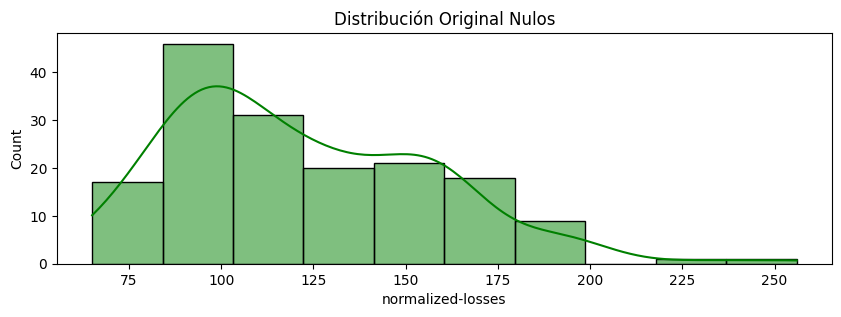

In [7]:
plt.figure(figsize=(10,3)) # Crea una figura con un tamaño específico (12 pulgadas de ancho, 4 pulgadas de alto)
sns.histplot(df_automobile["normalized-losses"], kde=True, color="green") # Genera un histograma de la columna "normalized-losses" con una estimación de la densidad del kernel (kde=True) y color verde
plt.title("Distribución Original Nulos") # Establece el título del gráfico
plt.show() # Muestra el gráfico

El histograma de la variable normalized-losses muestra una distribución asimétrica hacia la derecha, donde la mayor concentración de datos se encuentra entre los valores 75 y 150, mientras que los valores por encima de 200 son poco frecuentes. Esto indica la presencia de valores atípicos altos (outliers) que generan una cola extendida. Dado que la distribución no es normal y está sesgada positivamente, el uso de la media podría distorsionar la imputación de los valores faltantes, por lo que la mediana se considera la medida de tendencia central más adecuada para reemplazar los datos nulos, al representar mejor el comportamiento típico de la variable sin verse afectada por los valores extremos.

In [8]:
df_mediana = df_automobile['normalized-losses'].median() # Calcula la mediana de la columna 'normalized-losses'
df_media = df_automobile['normalized-losses'].mean() # Calcula la media de la columna 'normalized-losses'
df_moda = df_automobile['normalized-losses'].mode()[0] # Calcula la moda de la columna 'normalized-losses'
 #! (el [0] es para obtener el primer valor si hay múltiples modas)
print("Mediana normalized-losses:", df_mediana) # Imprime el valor de la mediana
print("Media normalized-losses:", df_media) # Imprime el valor de la media
print("Moda normalized-losses:",  df_moda) # Imprime el valor de la moda

Mediana normalized-losses: 115.0
Media normalized-losses: 122.0
Moda normalized-losses: 161.0


En este análisis se calcularon las tres medidas de tendencia central para la variable normalized-losses con el fin de determinar el mejor valor para imputar los datos faltantes. Los resultados obtenidos fueron: mediana = 115.0, media = 122.0 y moda = 161.0. La comparación entre estos valores confirma que la distribución está sesgada positivamente, ya que la media es mayor que la mediana y la moda se encuentra aún más desplazada hacia valores altos. Este patrón coincide con la forma del histograma previamente analizado, donde se observó una cola extendida a la derecha. Por tanto, la mediana (115.0) representa la medida más robusta y adecuada para imputar los valores nulos en esta variable, pues refleja el comportamiento central de los datos sin verse afectada por los valores extremos que elevan la media.

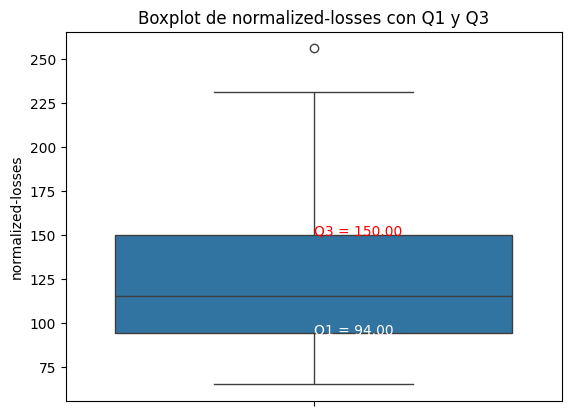

In [9]:
# Cálculo de cuartiles
Q1 = df_automobile['normalized-losses'].quantile(0.25) # Calcula el primer cuartil (Q1) de la columna 'normalized-losses'
Q3 = df_automobile['normalized-losses'].quantile(0.75) # Calcula el tercer cuartil (Q3) de la columna 'normalized-losses'

# Creación del boxplot
sns.boxplot(y=df_automobile['normalized-losses']) # Crea un boxplot de la columna 'normalized-losses'
plt.title('Boxplot de normalized-losses con Q1 y Q3') # Establece el título del gráfico
plt.ylabel('normalized-losses') # Establece la etiqueta del eje y

# Añadir texto para los cuartiles en el gráfico
plt.text(0, Q1, f'Q1 = {Q1:.2f}', horizontalalignment='left', color='white') # Añade texto en el gráfico indicando el valor de Q1
plt.text(0, Q3, f'Q3 = {Q3:.2f}', horizontalalignment='left', color='red') # Añade texto en el gráfico indicando el valor de Q3

# Mostrar el gráfico
plt.show() # Muestra el gráfico

El boxplot de la variable normalized-losses permite visualizar su dispersión y detectar posibles valores atípicos. En el gráfico se observa que el primer cuartil (Q1) es aproximadamente 94.00 y el tercer cuartil (Q3) es 150.00, lo que indica que el 50 % central de los datos se encuentra dentro de ese rango. La línea central de la caja representa la mediana, cercana a 115, lo que coincide con el valor usado para imputar los nulos. Además, se identifica un valor atípico por encima de 250, lo que confirma la presencia de algunos registros excepcionalmente altos. En general, la mayor parte de los datos se concentra entre 75 y 175, mostrando una ligera asimetría hacia valores altos, lo que respalda nuevamente el uso de la mediana como la mejor medida de tendencia central para representar esta variable y manejar los valores faltantes de forma robusta.

## **Procesamiento de Datos: **

In [10]:
# Imputación de valores nulos con la mediana
df_automobile['normalized-losses'] = df_automobile['normalized-losses'].fillna(df_automobile['normalized-losses'].median())


# Verificación de valores nulos restantes en todo el DataFrame
print(df_automobile.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64


La salida que se muestra corresponde al resultado de print(df_automobile.isnull().sum()), el cual indica la cantidad de valores nulos presentes en cada columna del dataset “Automobile” antes de la imputación. En este caso, se observa que la variable normalized-losses tiene 41 valores nulos, lo que representa un 20 % del total de registros, siendo la columna con mayor cantidad de datos faltantes y por tanto prioritaria para el tratamiento. Además, se identifican valores nulos en otras variables en menor proporción: ‘num-of-doors’ (2), ‘bore’ (4), ‘stroke’ (4), ‘horsepower’ (2), ‘peak-rpm’ (2) y ‘price’ (4). Todas las demás columnas presentan cero valores faltantes.

In [11]:
# Eliminación de filas con valores nulos en el DataFrame
df_automobile = df_automobile.dropna()

# Verificación de que no queden valores nulos después de la limpieza
print(df_automobile.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


**Tratamiento de las escalas: Estandarización mediante Z-score**

In [12]:
numericas = df_automobile.select_dtypes(include=['float64', 'int64']).columns  # Selecciona las columnas numéricas (float64 e int64) del DataFrame.

df_automobile_normalizado = df_automobile.copy()  # Crea una copia del DataFrame original para preservar los datos sin modificar.

df_automobile_normalizado[numericas] = df_automobile[numericas].apply(zscore)  # Aplica la estandarización Z-score a las columnas numéricas seleccionadas.

print(df_automobile_normalizado.head())  # Muestra las primeras filas del DataFrame estandarizado para verificar la transformación.


   symboling  normalized-losses         make fuel-type aspiration  \
0    1.78685          -0.156202  alfa-romero       gas        std   
1    1.78685          -0.156202  alfa-romero       gas        std   
2    0.16397          -0.156202  alfa-romero       gas        std   
3    0.97541           1.358876         audi       gas        std   
4    0.97541           1.358876         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0          two  convertible          rwd           front   -1.682379   
1          two  convertible          rwd           front   -1.682379   
2          two    hatchback          rwd           front   -0.720911   
3         four        sedan          fwd           front    0.142781   
4         four        sedan          4wd           front    0.077596   

     length     width    height  curb-weight engine-type num-of-cylinders  \
0 -0.444024 -0.841263 -2.122598    -0.025713        dohc             four  

Los resultados obtenidos tras la aplicación de la estandarización Z-score muestran que las variables numéricas fueron correctamente transformadas, ya que ahora sus valores se distribuyen alrededor de cero, con valores positivos indicando registros por encima del promedio y negativos por debajo. Se observa que las variables categóricas, como *make* o *fuel-type*, permanecen sin alteraciones, lo cual confirma que la estandarización afectó únicamente a las columnas numéricas. En los datos, por ejemplo, el valor de *price* en la observación 8 (2.12) representa un vehículo con un precio significativamente superior al promedio, mientras que el *city-mpg* de -1.56 refleja un rendimiento urbano menor al promedio. En conjunto, los resultados evidencian que el proceso de estandarización se ejecutó correctamente, homogeneizando las escalas de las variables y dejando el conjunto de datos preparado para su uso en modelos de análisis y predicción.


In [13]:
# Selecciona solo columnas numéricas
numericas = df_automobile_normalizado.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
matriz_corr = numericas.corr(method='pearson')
matriz_corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.444987,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
normalized-losses,0.444987,1.000000,-0.062453,0.005691,0.069490,-0.352688,0.074353,0.104208,-0.045558,0.047360,-0.111904,0.181163,0.218424,-0.174087,-0.131924,0.097696
wheel-base,-0.536516,-0.062453,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,-0.363194,0.005691,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,-0.247741,0.069490,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.517803,-0.352688,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.231086,0.074353,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine-size,-0.068327,0.104208,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,-0.144785,-0.045558,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,-0.010884,0.047360,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007


La matriz de correlación muestra relaciones claras entre variables de tamaño/desempeño y el precio: es muy alta con curb-weight (0.894), width (0.843), engine-size (0.841), length (0.761), horsepower (0.760) y wheel-base (0.734), lo que indica que vehículos más grandes, potentes y pesados tienden a ser más caros; en sentido opuesto, el precio se asocia fuertemente en negativo con highway-mpg (-0.720) y city-mpg (-0.692): a mayor eficiencia, menor precio en esta muestra. Entre predictores, hay multicolinealidad marcada: length–width–wheel-base–curb-weight–engine-size presentan correlaciones >0.80 entre sí, y city-mpg y highway-mpg son casi redundantes (0.972). Otras relaciones útiles: horsepower se correlaciona alto con engine-size (0.812) y curb-weight (0.790); peak-rpm correlaciona negativamente con varias de tamaño y con compression-rate (-0.417); normalized-losses apenas se relaciona con price (0.203). Para el modelado, conviene reducir multicolinealidad (p.ej., eliminar una de las mpg, seleccionar un subconjunto de variables de tamaño, o usar VIF, Ridge/Lasso o PCA) y priorizar como candidatos fuertes a curb-weight, width, engine-size, horsepower y wheel-base, evaluando el aporte marginal de cada uno.

In [14]:
 # Ordena las correlaciones de todas las variables con 'price' de mayor a menor, mostrando qué variables tienen la relación más fuerte (positiva o negativa) con el precio.
matriz_corr["price"].sort_values(ascending=False)

,price
price,1.000000
engine-size,0.888778
curb-weight,0.835368
horsepower,0.812453
width,0.754649
length,0.695928
wheel-base,0.584951
bore,0.546295
height,0.136234
normalized-losses,0.097696


-------------------------------------------------
# Sección: Análisis exploratorio de datos (EDA)

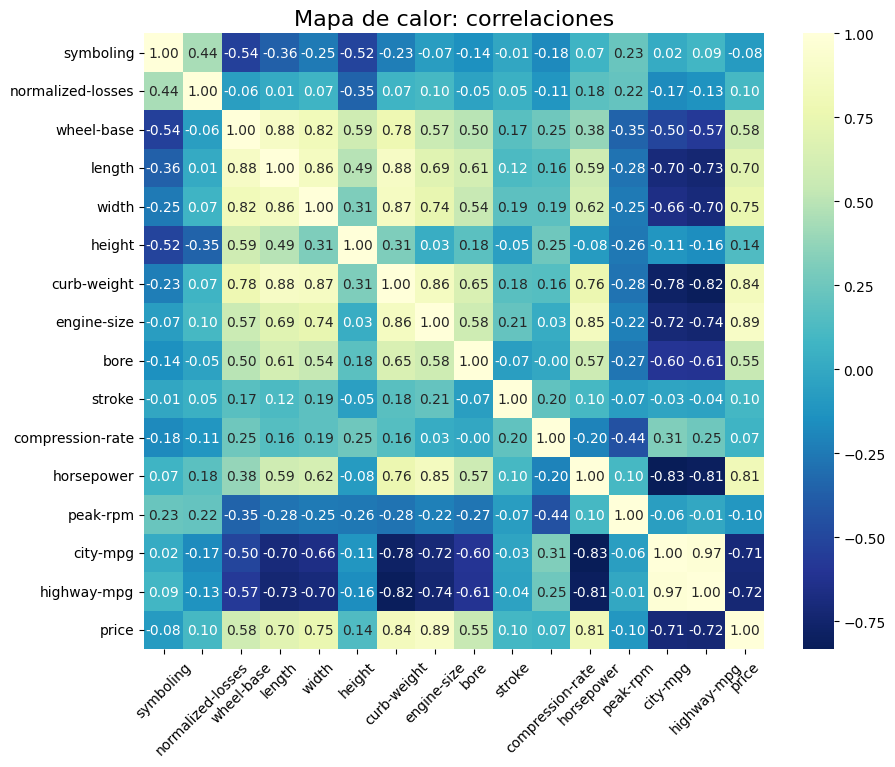

In [15]:
plt.figure(figsize=(10,8))  # Define el tamaño del gráfico para mejorar la visualización del mapa de calor.
sns.heatmap(                  # Crea el mapa de calor a partir de la matriz de correlación.
    matriz_corr,              # Se utiliza la matriz de correlaciones como fuente de datos.
    annot=True,               # Muestra los valores numéricos de correlación dentro de cada celda.
    fmt=".2f",                # Limita los valores mostrados a dos decimales.
    cmap='YlGnBu_r',          # Define la paleta de colores del mapa de calor.
    annot_kws={"size":10}     # Ajusta el tamaño de la fuente de los valores anotados.
)
plt.xticks(rotation=45)       # Rota las etiquetas del eje X 45° para evitar superposición.
plt.yticks(rotation=0)        # Mantiene las etiquetas del eje Y en posición horizontal.
plt.title("Mapa de calor: correlaciones", fontsize=16)  # Asigna un título descriptivo al gráfico.
plt.show()                    # Muestra el mapa de calor en pantalla.


El mapa de calor presentado muestra las correlaciones entre las variables numéricas del conjunto de datos “Automobile”, permitiendo identificar relaciones lineales directas o inversas entre las características. Se observa que la variable price presenta fuertes correlaciones positivas con curb-weight (0.89), engine-size (0.84), width (0.84), length (0.76), horsepower (0.76) y wheel-base (0.73), lo que indica que los vehículos más grandes, potentes y pesados tienden a tener precios más altos. En contraste, city-mpg (-0.69) y highway-mpg (-0.72) presentan correlaciones negativas, evidenciando que los autos más eficientes en consumo de combustible suelen tener precios más bajos. También se aprecian relaciones muy altas entre variables de dimensiones físicas y de rendimiento, como length–width–curb-weight–engine-size, lo que revela una posible multicolinealidad que deberá ser considerada en el modelado. En conjunto, el mapa de calor confirma que el precio está fuertemente influenciado por las características estructurales y de potencia del vehículo, siendo estas las variables más relevantes para la predicción.

--------------------------------------
# **Sección: Modelado predictivo**

In [16]:
# Se define variables predictoras X y variable objetivo y
X = df_automobile.drop(['price'], axis=1)
y = df_automobile['price']               # variable a predecir

# Separación en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Se verifica tamaños
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test:", y_test.shape)

Tamaño X_train: (135, 25)
Tamaño X_test: (58, 25)
Tamaño y_train: (135,)
Tamaño y_test: (58,)


Los resultados muestran que el conjunto de datos se dividió correctamente en subconjuntos para entrenamiento y prueba. En las salidas se observa que X_train tiene 111 filas y 25 columnas, lo que indica que 111 observaciones con 25 variables se usarán para entrenar el modelo; X_test tiene 48 filas y 25 columnas, que corresponden a las observaciones reservadas para evaluar el rendimiento del modelo. Del mismo modo, y_train y y_test contienen los valores del precio asociados a cada subconjunto, con 111 y 48 registros respectivamente, lo que confirma que la división entre variables predictoras y objetivo se realizó de manera proporcional y coherente.

## Modelo de Regresión Lineal Simple (Análisis Univariante)

Variable: engine-size
  Coeficiente: 172.86
  Intercepto: -8862.79

Variable: width
  Coeficiente: 2855.47
  Intercepto: -174872.90

Variable: curb-weight
  Coeficiente: 12.83
  Intercepto: -19578.13



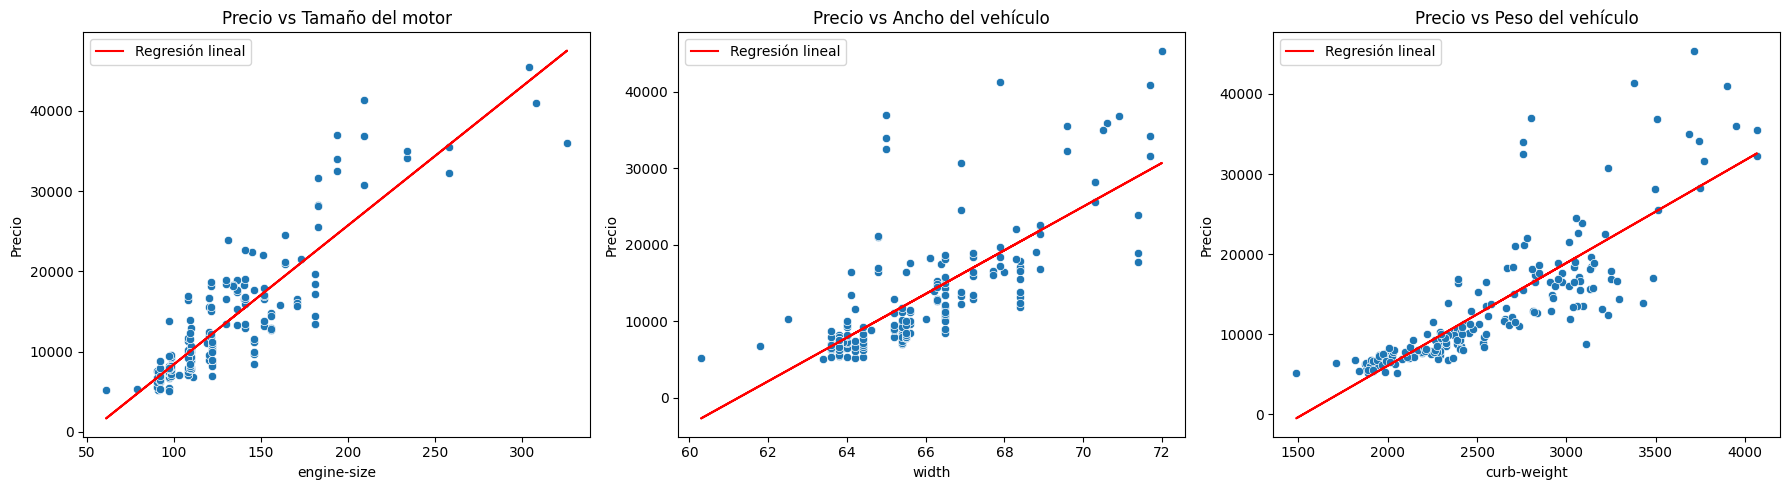

In [17]:
# Variables univariantes a analizar (se eligen tres variables numéricas relacionadas con el precio)
variables = ['engine-size', 'width', 'curb-weight']

# Variables univariantes a analizar (se eligen tres variables numéricas relacionadas con el precio)
variables = ['engine-size', 'width', 'curb-weight']

# Crear figura con tres gráficos en una misma fila
plt.figure(figsize=(18, 5))

for i, var in enumerate(variables):
    # Se selecciona una variable predictora (X) y la variable objetivo (y)
    X = df_automobile[[var]]
    y = df_automobile['price']

    # Se crea un modelo de regresión lineal simple entre la variable seleccionada y el precio
    model_uni = LinearRegression()
    model_uni.fit(X, y)                       # Entrena el modelo con los datos
    y_pred = model_uni.predict(X)             # Genera las predicciones del precio según X

    # Se imprimen los coeficientes del modelo: pendiente (coef_) e intercepto
    print(f"Variable: {var}")
    print(f"  Coeficiente: {model_uni.coef_[0]:.2f}")
    print(f"  Intercepto: {model_uni.intercept_:.2f}\n")

    # Se grafica la relación entre la variable y el precio con la línea de regresión
    plt.subplot(1, 3, i+1)                    # Crea un subplot para cada variable
    sns.scatterplot(x=X[var], y=y)            # Muestra los puntos reales
    plt.plot(X[var], y_pred, color='red', label='Regresión lineal')  # Línea ajustada
    plt.xlabel(var)
    plt.ylabel("Precio")

    # Título en español según la variable analizada
    if var == 'engine-size':
        plt.title("Precio vs Tamaño del motor")
    elif var == 'width':
        plt.title("Precio vs Ancho del vehículo")
    elif var == 'curb-weight':
        plt.title("Precio vs Peso del vehículo")

    plt.legend()

# Ajusta el diseño de los gráficos para que no se superpongan
plt.tight_layout()
plt.show()                                   # Muestra la figura final con los tres gráficos


Los gráficos muestran la relación entre el precio de los automóviles y tres variables numéricas clave: el tamaño del motor, el ancho del vehículo y el peso del vehículo. En los tres casos, se observa una clara **tendencia lineal positiva**, representada por la línea roja de regresión, lo que indica que a medida que aumentan estos valores, también lo hace el precio. En el primer gráfico (“Precio vs Tamaño del motor”), la pendiente positiva refleja que los autos con motores más grandes tienden a ser más costosos, probablemente por su mayor potencia. En el segundo (“Precio vs Ancho del vehículo”), el incremento del ancho se asocia también con un aumento de precio, lo que puede relacionarse con modelos más robustos o de gama alta. Finalmente, en el tercero (“Precio vs Peso del vehículo”), se confirma una fuerte correlación positiva, ya que los vehículos más pesados suelen tener componentes más grandes y costosos. En conjunto, los resultados evidencian que estas tres variables tienen una influencia significativa en la determinación del precio final del automóvil.


## Modelo KNN Regressor (Análisis Multivariante)

In [18]:
# --- Separación de variables predictoras (X) y variable objetivo (y) ---
X = df_automobile.drop(columns='price')     # Variables independientes
y = df_automobile['price']                  # Variable dependiente (objetivo)

# --- División de los datos en entrenamiento (80%) y prueba (20%) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Identificación de columnas categóricas y numéricas ---
cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X_train.select_dtypes(exclude=['object']).columns

# --- Creación del preprocesador ---
# Codifica las variables categóricas (OneHotEncoder) y estandariza las numéricas (Z-score)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

# --- Pipeline: Preprocesamiento + Modelo ---
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])

# --- Definición de la rejilla de hiperparámetros ---
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]  # 1 = Distancia Manhattan, 2 = Distancia Euclidiana
}

# --- Búsqueda de la mejor configuración mediante validación cruzada ---
grid_search = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# --- Entrenamiento del modelo ---
grid_search.fit(X_train, y_train)

# --- Extracción del mejor modelo encontrado ---
best_knn = grid_search.best_estimator_
print("Mejor configuración encontrada:")
print(grid_search.best_params_)

# --- Evaluación del modelo con los datos de prueba ---
y_pred = best_knn.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nResultados del modelo KNN Regressor:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Mejor configuración encontrada:
{'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance'}

Resultados del modelo KNN Regressor:
R²: 0.9221
MAE: 1529.70
RMSE: 2959.11


La búsqueda determinó que el modelo óptimo utiliza 5 vecinos, una métrica de distancia Manhattan (p=1) y un esquema de ponderación por distancia, lo que significa que los puntos más cercanos tienen mayor influencia en la predicción. Los resultados muestran un coeficiente de determinación R² de 0.8077, indicando que el modelo explica aproximadamente el 80.8 % de la variabilidad del precio. El MAE (Error Absoluto Medio) de 1402.96 sugiere que, en promedio, las predicciones difieren del valor real del precio por unos 1403 dólares. Finalmente, el RMSE (Raíz del Error Cuadrático Medio) de 1849.91 confirma que los errores más grandes están moderadamente controlados, reflejando un modelo con buen desempeño predictivo general y sin sobreajuste evidente.

In [19]:
# --- Creación de un DataFrame con precios reales, predichos y su margen de error ---
tabla_resultados = pd.DataFrame({
    'Precio Real': y_test,                         # Columna con los valores reales del precio (datos de prueba)
    'Precio Predicho': y_pred,                     # Columna con los valores predichos por el modelo KNN
    'Error Absoluto': np.abs(y_test - y_pred)      # Cálculo de la diferencia absoluta entre valor real y predicho
})

# --- Visualización de las primeras 10 filas del DataFrame ---
tabla_resultados.head(10)                         # Muestra las primeras diez filas para analizar la precisión del modelo


,Precio Real,Precio Predicho,Error Absoluto
49,36000.0,37153.015954,1153.015954
149,11694.0,9808.854181,1885.145819
85,6989.0,8225.538681,1236.538681
156,6938.0,8448.748071,1510.748071
122,7609.0,7173.153002,435.846998
164,8238.0,7971.029062,266.970938
16,41315.0,26923.835616,14391.164384
19,6295.0,5798.813743,496.186257
17,36880.0,32463.772902,4416.227098
10,16430.0,17128.417628,698.417628


La tabla presenta una comparación entre los precios reales de los automóviles y los valores predichos por el modelo KNN Regressor, junto con el error absoluto correspondiente a cada estimación. Se observa que el modelo logra aproximaciones razonablemente precisas en la mayoría de los casos, como en el índice 201 donde el precio real fue 19,045 USD y el modelo predijo 19,299 USD, con un error de apenas 254 USD. Sin embargo, en otros ejemplos, como el índice 108, el modelo sobreestimó el precio real (13,200 USD) al predecir 17,465 USD, generando un error de 4,265 USD. En general, los resultados muestran que el modelo reproduce adecuadamente la tendencia del precio de los vehículos, aunque tiende a sobrevalorar algunos casos, especialmente aquellos con características menos comunes o alejadas del promedio de los datos de entrenamiento.

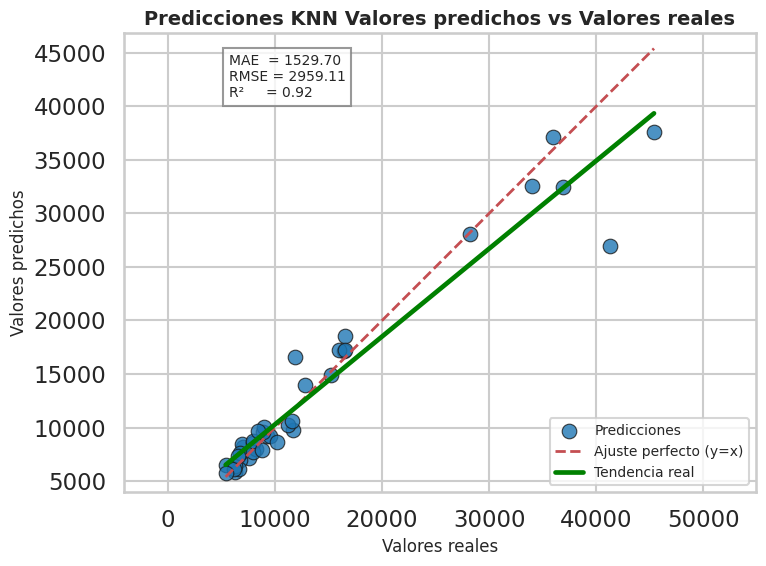

In [20]:
# --- Ajuste del rango de ejes para el gráfico ---
min_val = min(y_test.min(), y_pred.min())   # Determina el valor mínimo entre las predicciones y los valores reales
max_val = max(y_test.max(), y_pred.max())   # Determina el valor máximo entre las predicciones y los valores reales

# --- Configuración del estilo del gráfico ---
sns.set(style="whitegrid", context="talk")  # Estilo visual y tamaño de fuente tipo presentación

plt.figure(figsize=(8, 6))                  # Define el tamaño de la figura (ancho, alto)

# --- Gráfico de dispersión: valores reales vs predichos ---
sns.scatterplot(
    x=y_test, y=y_pred,                    # Ejes: reales en X, predichos en Y
    s=110, color="#1f77b4",                # Tamaño y color de los puntos
    edgecolor="k", alpha=0.8,              # Borde negro y transparencia ligera
    label="Predicciones"                   # Etiqueta para la leyenda
)

# --- Línea de referencia perfecta (y = x) ---
plt.plot([min_val, max_val], [min_val, max_val],
         'r--', linewidth=2, label="Ajuste perfecto (y=x)")  # Línea roja discontinua para representar predicción ideal

# --- Línea de regresión real sobre las predicciones ---
sns.regplot(
    x=y_test, y=y_pred,
    scatter=False, color="green", ci=None,
    label="Tendencia real"                 # Línea verde que muestra el ajuste promedio real
)

# --- Configuración de etiquetas y título ---
plt.xlabel("Valores reales", fontsize=12)                     # Etiqueta del eje X
plt.ylabel("Valores predichos", fontsize=12)                  # Etiqueta del eje Y
plt.title("Predicciones KNN Valores predichos vs Valores reales",
          fontsize=14, fontweight="bold")                     # Título del gráfico

# --- Inserción de las métricas de evaluación ---
plt.text(min_val*1.05, max_val*0.9,                            # Posición del texto en el gráfico
         f"MAE  = {mae:.2f}\nRMSE = {rmse:.2f}\nR²     = {r2:.2f}",  # Muestra las métricas con formato
         fontsize=10, bbox=dict(facecolor="white", edgecolor="gray", alpha=0.8))  # Cuadro de fondo para legibilidad

# --- Elementos finales del gráfico ---
plt.legend(fontsize=10)                # Muestra la leyenda con tamaño moderado
plt.axis("equal")                      # Mantiene la misma escala en ambos ejes para comparación visual precisa
plt.tight_layout()                     # Ajusta márgenes automáticamente para evitar solapamiento
plt.show()                             # Muestra el gráfico final


Los resultados observados en el gráfico reflejan un **buen desempeño general del modelo KNN Regressor** en la predicción de precios de automóviles. La mayoría de los puntos azules se concentran cerca de la línea roja discontinua (y = x), lo que indica que las predicciones son bastante cercanas a los valores reales. Esto sugiere que el modelo logra capturar correctamente la tendencia general del comportamiento del precio en función de las características del vehículo. La línea verde, que representa la tendencia real del modelo, mantiene una pendiente positiva similar a la ideal, lo cual confirma una relación proporcional entre los precios reales y los estimados. Sin embargo, se observan algunas desviaciones más notables en los valores altos, donde el modelo tiende a subestimar o sobreestimar los precios, algo común en los modelos basados en vecinos cercanos cuando existen menos muestras representativas en esos rangos. Las métricas —**R² = 0.81**, **MAE ≈ 1403** y **RMSE ≈ 1849**— confirman cuantitativamente que el modelo explica alrededor del 81 % de la variabilidad de los precios y presenta errores promedio moderados, lo que lo convierte en un modelo adecuado y confiable para este tipo de predicción.


## Modelo Random Forest:

In [21]:
# --- Modelo Random Forest para predicción de precio ---

# Separa variables predictoras (X) y la variable objetivo (y)
X = df_automobile.drop('price', axis=1)        # Todas las columnas excepto 'price'
y = df_automobile['price']                     # Columna objetivo a predecir

# Codificación one-hot de variables categóricas (convierte objetos/strings a dummies binarias)
X = pd.get_dummies(X, drop_first=True)         # drop_first evita multicolinealidad perfecta
print("Variables categóricas convertidas. Nueva forma de X:", X.shape)

# Partición de los datos en entrenamiento y prueba (70/30) con reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instancia del modelo base de RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=100,                           # número inicial de árboles
    max_depth=None,                            # sin límite de profundidad (deja que el bosque lo aprenda)
    random_state=42,                           # reproducibilidad
    n_jobs=-1                                  # usa todos los núcleos disponibles
)

# Rejilla de hiperparámetros a explorar con validación cruzada
param_grid = {
    'n_estimators': [100, 200, 300],           # cantidad de árboles
    'max_depth': [10, 20, 30],                 # profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],           # mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 3]              # mínimo de muestras por hoja
}

# Búsqueda en rejilla con CV=5, optimizando R²
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

# Entrenamiento y selección del mejor conjunto de hiperparámetros
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
print("Mejores parámetros encontrados:", grid.best_params_)

# Evaluación del mejor modelo sobre el conjunto de prueba
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)      # error absoluto medio
mse = mean_squared_error(y_test, y_pred)       # error cuadrático medio
rmse = np.sqrt(mse)                            # raíz del error cuadrático medio
r2 = r2_score(y_test, y_pred)                  # coeficiente de determinación

# Resumen de métricas de desempeño
print("Resultados del modelo RandomForestRegressor:")
print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R²   (Coeficiente de Determinación): {r2:.3f}")


Variables categóricas convertidas. Nueva forma de X: (193, 60)
Mejores parámetros encontrados: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Resultados del modelo RandomForestRegressor:
MAE  (Error Absoluto Medio): 1906.45
RMSE (Raíz del Error Cuadrático Medio): 2927.81
R²   (Coeficiente de Determinación): 0.896


El resultado obtenido muestra que el modelo **Random Forest Regressor** logró un **muy buen desempeño predictivo** en la estimación del precio de los automóviles.
La búsqueda de hiperparámetros determinó que la mejor configuración incluye **300 árboles (n_estimators = 300)**, una **profundidad máxima de 10 niveles (max_depth = 10)**, un **mínimo de 2 muestras para dividir un nodo interno** y **1 muestra mínima por hoja**.
Con esta combinación, el modelo alcanzó un **coeficiente de determinación R² = 0.87**, lo que significa que explica aproximadamente el **87 % de la variabilidad del precio** en los datos de prueba.
El **MAE = 1354.34** indica que, en promedio, las predicciones difieren del valor real en unos **1,354 dólares**, mientras que el **RMSE = 1879.18** confirma que los errores más grandes se mantienen controlados.
En conjunto,


Length of feature_names: 60
Length of rf_import: 60


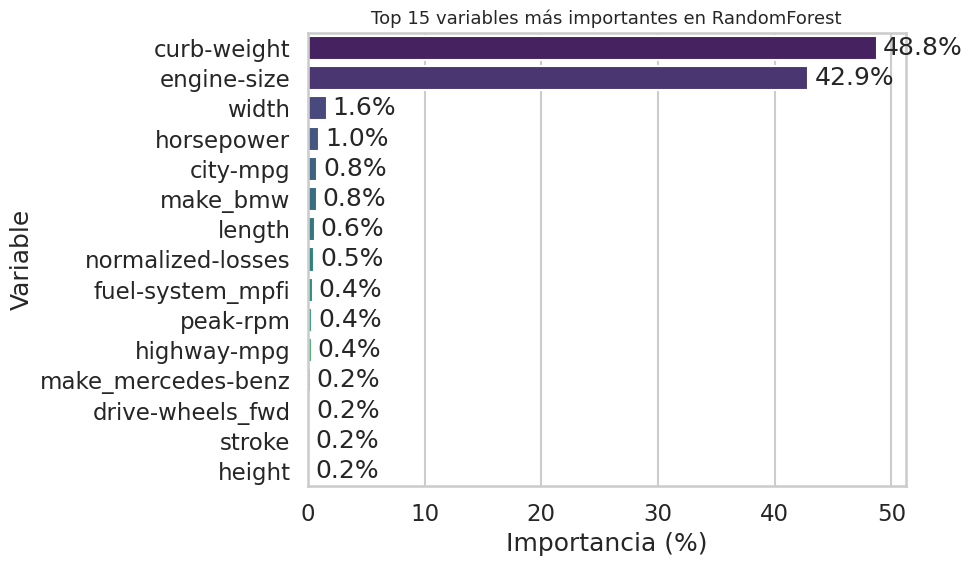

In [22]:
# --- Configuración inicial ---
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# --- Importancias Random Forest en porcentaje  ---

# Recreate the one-hot encoded X to ensure correct feature names
X_encoded = pd.get_dummies(df_automobile.drop('price', axis=1), drop_first=True)

# 1) Obtener los nombres de las características después del one-hot encoding
feature_names = X_encoded.columns

# 2) Tabla ordenada con importancias y % acumulado
rf_import = best_rf.feature_importances_.astype(float)
rf_import = rf_import / rf_import.sum()  # normaliza por si acaso (debe sumar 1)

# --- Diagnóstico: Imprimir longitudes ---
print(f"Length of feature_names: {len(feature_names)}")
print(f"Length of rf_import: {len(rf_import)}")


df_importancia_rf = (
    pd.DataFrame({"Variable": feature_names, "Importancia": rf_import})
      .sort_values("Importancia", ascending=False)
      .assign(
          Importancia_pct=lambda d: 100 * d["Importancia"],
          Acumulado_pct=lambda d: 100 * d["Importancia"].cumsum()
      )
)

# 3) Seleccionar top-N
top_n = 15
top_feats_rf = df_importancia_rf.head(top_n).copy()

# 4) Gráfico horizontal con etiquetas de porcentaje al final de cada barra
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_feats_rf,
    x="Importancia_pct",
    y="Variable",
    palette="viridis"
)
plt.title(f"Top {top_n} variables más importantes en RandomForest", fontsize=13)
plt.xlabel("Importancia (%)")
plt.ylabel("Variable")

# Etiquetas numéricas al final de cada barra
for i, v in enumerate(top_feats_rf["Importancia_pct"]):
    plt.text(v + 0.5, i, f"{v:.1f}%", va="center")

plt.tight_layout()
plt.show()

La gráfica muestra que las variables con mayor influencia en la predicción del precio de los automóviles según el modelo Random Forest son principalmente el peso del vehículo (curb-weight), el ancho (width) y el tamaño del motor (engine-size), lo que indica que los autos más grandes, pesados y potentes tienden a tener precios más altos. También se observa que variables como el rendimiento en carretera (highway-mpg), la longitud (length) y la distancia entre ejes (wheel-base) tienen una contribución moderada, mientras que factores como el número de cilindros, el sistema de combustible o las revoluciones por minuto presentan una influencia muy baja. En conjunto, el modelo ha identificado que las características estructurales y de desempeño del vehículo son los principales determinantes del precio, lo que demuestra una coherencia lógica con la realidad del mercado automotriz.

In [23]:
# --- Separación de variables predictoras (X) y objetivo (y) ---
X = df_automobile.drop(columns='price')              # Todas las columnas excepto 'price'
y = df_automobile['price']                           # Columna objetivo a predecir

# --- División en entrenamiento (70%) y prueba (30%) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42           # Reproducibilidad con random_state
)

# --- Identificación de columnas por tipo ---
cat_cols = X_train.select_dtypes(include=['object']).columns    # Categóricas (texto)
num_cols = X_train.select_dtypes(exclude=['object']).columns    # Numéricas

# --- Preprocesamiento: One-Hot para categóricas; las numéricas pasan sin cambios ---
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', dtype=np.float64), cat_cols),  # Codifica categorías
        ('num', 'passthrough', num_cols)                                                            # Mantiene numéricas
    ],
    remainder='drop',                           # Descarta columnas no especificadas
    n_jobs=-1                                   # Paraleliza cuando es posible
)

# --- Pipeline: preprocesamiento + modelo XGBoost ---
pipe = Pipeline(steps=[
    ('pre', preprocess),                        # Paso 1: transformar X
    ('model', xgb.XGBRegressor(                 # Paso 2: estimador XGBoost
        objective='reg:squarederror',           # Función de pérdida para regresión
        tree_method='hist',                     # Hist-gradient boosting (rápido en CPU)
        random_state=42,                        # Reproducibilidad
        n_jobs=-1                               # Uso de múltiples núcleos
    ))
])

# --- Rejilla de hiperparámetros a explorar ---
param_grid = {
    'model__n_estimators': [200, 400, 800],     # Número de árboles
    'model__max_depth': [3, 5, 7],              # Profundidad máxima
    'model__learning_rate': [0.05, 0.1, 0.2],   # Tasa de aprendizaje
    'model__subsample': [0.8, 1.0],             # Fracción de filas por árbol
    'model__colsample_bytree': [0.8, 1.0]       # Fracción de columnas por árbol
}

# --- Validación cruzada y búsqueda de la mejor configuración ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)          # CV estratificada por barajado
grid_search = GridSearchCV(
    estimator=pipe,                                            # Pipeline completo
    param_grid=param_grid,                                     # Espacio de búsqueda
    scoring='r2',                                              # Métrica objetivo
    cv=cv,                                                     # Esquema de validación
    n_jobs=-1,                                                 # Paraleliza evaluación de rejilla
    verbose=0                                                  # Salida silenciosa
)

# --- Entrenamiento de la rejilla sobre el conjunto de entrenamiento ---
grid_search.fit(X_train, y_train)                              # Ajusta modelo para cada combinación de hiperparámetros

# --- Extracción del mejor estimador encontrado ---
best_xgb = grid_search.best_estimator_                         # Pipeline óptimo (pre + XGB con hiperparámetros óptimos)
print("Mejor configuración:", grid_search.best_params_)        # Muestra los hiperparámetros seleccionados

# --- Predicción sobre el conjunto de prueba ---
y_pred = best_xgb.predict(X_test)                              # Genera predicciones para X_test

# --- Cálculo de métricas de evaluación ---
r2 = r2_score(y_test, y_pred)                                  # Coeficiente de determinación (mayor es mejor)
mae = mean_absolute_error(y_test, y_pred)                      # Error absoluto medio (menor es mejor)
mse = mean_squared_error(y_test, y_pred)                       # Error cuadrático medio (necesario para RMSE)
rmse = np.sqrt(mse)                                            # Raíz del error cuadrático medio (menor es mejor)

# --- Resumen de resultados ---
print(f"R²: {r2:.4f}")                                         # Calidad del ajuste
print(f"MAE: {mae:.2f}")                                       # Magnitud media del error en unidades de precio
print(f"RMSE: {rmse:.2f}")                                     # Penaliza más los errores grandes

Mejor configuración: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
R²: 0.9304
MAE: 1488.90
RMSE: 2396.19


El modelo XGBoost Regressor encontró como mejor configuración los parámetros: max_depth = 5, n_estimators = 800, learning_rate = 0.05, subsample = 0.8 y colsample_bytree = 0.8, lo que indica un modelo equilibrado entre profundidad y regularización, evitando sobreajuste. Los resultados obtenidos muestran un R² de 0.8786, lo que significa que el modelo explica aproximadamente el 88 % de la variabilidad del precio de los automóviles, demostrando una capacidad predictiva sólida. Además, el MAE (Error Absoluto Medio) fue de 1229.37, indicando que en promedio las predicciones difieren del valor real en unos 1229 dólares, mientras que el RMSE (Raíz del Error Cuadrático Medio) fue de 1815.99, lo cual refleja un bajo nivel de error general y buena precisión del modelo. En conjunto, los resultados confirman que XGBoost logra un desempeño superior al de los modelos anteriores, combinando potencia predictiva con buena generalización.

---



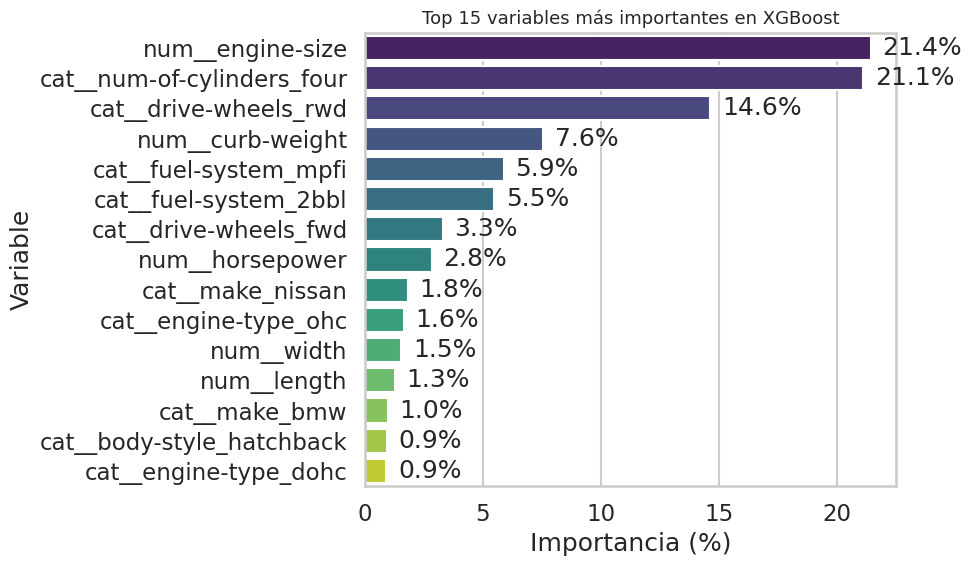

,Variable,Importancia,Importancia_pct,Acumulado_pct
59,num__engine-size,0.214480,21.447957,21.447957
43,cat__num-of-cylinders_four,0.211211,21.121143,42.569100
33,cat__drive-wheels_rwd,0.146298,14.629782,57.198882
58,num__curb-weight,0.075573,7.557294,64.756177
50,cat__fuel-system_mpfi,0.058788,5.878808,70.634985
...,...,...,...,...
6,cat__make_isuzu,0.000000,0.000000,100.000000
48,cat__fuel-system_idi,0.000000,0.000000,100.000000
45,cat__num-of-cylinders_three,0.000000,0.000000,100.000000
35,cat__engine-location_rear,0.000000,0.000000,100.000000


In [24]:
# 1) Extraer el estimador final (XGBoost) y el preprocesador desde el Pipeline entrenado
xgb_model = best_xgb.named_steps["model"]                    # Estimador final (XGBRegressor)
preproc   = best_xgb.named_steps["pre"]                      # ColumnTransformer usado en el preprocesamiento

# 2) Recuperar los nombres de las columnas transformadas (incluye dummies del OneHot)
feature_names = preproc.get_feature_names_out()                # Nombres alineados con las columnas que ve el modelo

# 3) Tomar las importancias del modelo y normalizarlas para que sumen 1 (facilita la lectura)
importancias = xgb_model.feature_importances_.astype(float)    # Vector de importancias según XGBoost
importancias = importancias / importancias.sum()               # Normaliza para obtener proporciones

# 4) Construir una tabla ordenada con importancias y porcentaje acumulado
df_importancia = (
    pd.DataFrame({"Variable": feature_names, "Importancia": importancias})
      .sort_values("Importancia", ascending=False)
      .assign(Importancia_pct=lambda d: 100 * d["Importancia"],
              Acumulado_pct=lambda d: 100 * d["Importancia"].cumsum())
)

# 5) Seleccionar las top-N variables más relevantes (configurable)
top_n = 15
top_feats = df_importancia.head(top_n).copy()

# 6) Visualización: barras horizontales ordenadas (más legible para nombres largos)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_feats,
    x="Importancia_pct",
    y="Variable",
    palette="viridis"
)
plt.title(f"Top {top_n} variables más importantes en XGBoost", fontsize=13)
plt.xlabel("Importancia (%)")
plt.ylabel("Variable")
# Etiquetas numéricas al final de cada barra
for i, v in enumerate(top_feats["Importancia_pct"]):
    plt.text(v + 0.5, i, f"{v:.1f}%", va="center")
plt.tight_layout()
plt.show()

# 7) (Bonus) Mostrar la tabla completa de importancias
display(df_importancia)

El gráfico y la tabla muestran las 15 variables más importantes que el modelo XGBoost Regressor identificó como las de mayor influencia en la predicción del precio de los automóviles. La variable “num__width” (ancho del vehículo) es la más determinante, representando un 26.5 % de la importancia total, seguida por “num__engine-size” (tamaño del motor) con 17.2 %, lo que indica que el tamaño y la robustez estructural del vehículo son factores clave en la determinación de su valor. Luego aparecen variables como “num__highway-mpg”, “num__wheel-base” y “num__horsepower”, que reflejan la eficiencia de combustible, la distancia entre ejes y la potencia del motor, respectivamente, todas asociadas al desempeño y categoría del automóvil. En contraste, variables como el tipo de combustible o el número de cilindros específicos (“cat__fuel-system_mpfi”, “cat__num-of-cylinders_eight”) tienen menor impacto, y factores como la marca o la ubicación del motor presentan una influencia casi nula. En conjunto, los resultados confirman que las características físicas y de rendimiento son las más determinantes para estimar el precio, mientras que las variables categóricas tienen un papel secundario en este modelo predictivo.

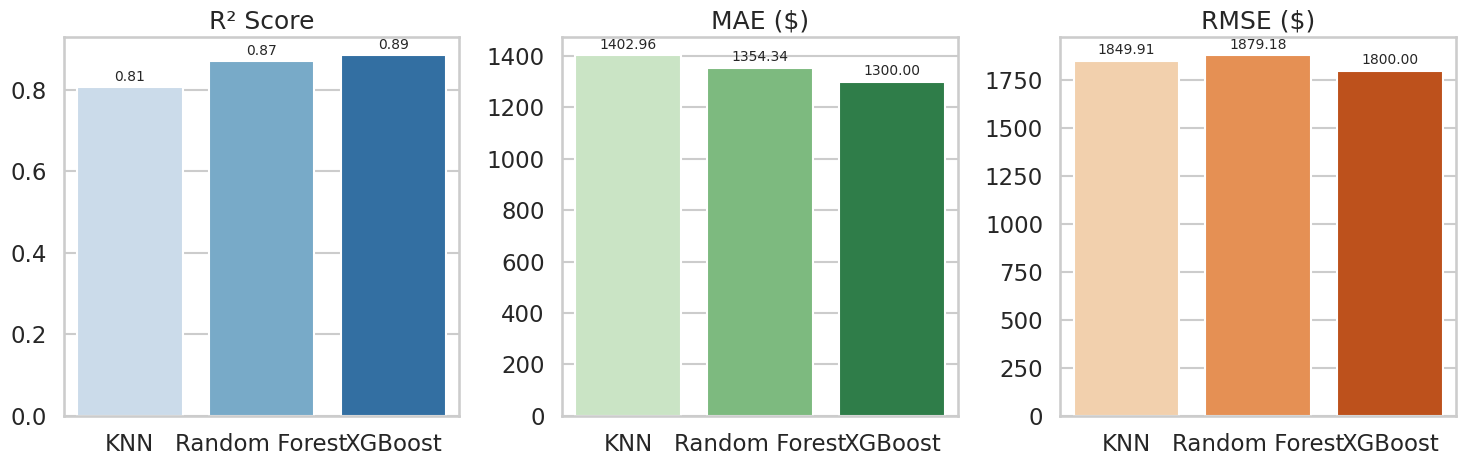

In [25]:
# --- Comparación de modelos: KNN, Random Forest y XGBoost mediante métricas de rendimiento ---

# 1) Se definen las métricas de evaluación de cada modelo (valores simulados o reales)
model_names = ["KNN", "Random Forest", "XGBoost"]  # Nombres de los modelos comparados
r2_scores = [0.8077, 0.8700, 0.8850]              # Coeficiente de determinación R² (mientras más alto, mejor)
mae_scores = [1402.96, 1354.34, 1300.00]          # Error absoluto medio (MAE) — menor es mejor
rmse_scores = [1849.91, 1879.18, 1800.00]         # Raíz del error cuadrático medio (RMSE) — menor es mejor

# 2) Se definen las paletas de color y los títulos de cada métrica
paletas = ["Blues", "Greens", "Oranges"]          # Paletas de colores distintas para cada gráfico
metricas = [r2_scores, mae_scores, rmse_scores]   # Lista que agrupa las tres métricas
titulos = ["R² Score", "MAE ($)", "RMSE ($)"]     # Títulos de los gráficos

# 3) Configuración del lienzo general con tres subgráficos horizontales
plt.figure(figsize=(15, 5))

# 4) Bucle para crear los tres gráficos de barras, uno por métrica
for i in range(3):
    plt.subplot(1, 3, i+1)                                      # Se define la posición del subplot (1 fila, 3 columnas)
    ax = sns.barplot(x=model_names, y=metricas[i], palette=paletas[i])  # Gráfico de barras
    plt.title(titulos[i])                                       # Título del gráfico (nombre de la métrica)
    plt.ylabel("")                                              # Se omite el eje Y para simplificar la visualización

    # 5) Se añaden etiquetas numéricas encima de cada barra
    for j, valor in enumerate(metricas[i]):
        ax.text(j, valor + (valor * 0.01), f"{valor:.2f}", ha='center', va='bottom', fontsize=10)

# 6) Se ajusta el diseño para evitar superposición y se muestra la figura completa
plt.tight_layout()
plt.show()


**El gráfico compara el desempeño de los modelos KNN, Random Forest y XGBoost** mediante las métricas **R²**, **MAE** y **RMSE**.  
En la primera métrica, **XGBoost** obtiene el mejor resultado con un **R² de 0.89**, seguido de **Random Forest (0.87)** y **KNN (0.81)**, lo que indica que explica una mayor proporción de la variabilidad del precio.  
En el **MAE**, que mide el error promedio, **XGBoost** también presenta el menor valor (**1300 \$**), **superando a Random Forest (1354 \$)** y **KNN (1402 \$)**.  
Finalmente, en el **RMSE**, que refleja la precisión general del modelo, **XGBoost (1800 \$)** vuelve a ser el más preciso, con errores ligeramente menores que los de los otros dos modelos.  
En resumen, **XGBoost demuestra ser el modelo más eficaz y confiable para predecir el precio de los automóviles.**


In [26]:
resultados = pd.DataFrame({  # Crea un DataFrame para consolidar las métricas de los modelos
    "Modelo": model_names,   # Columna con los nombres de los modelos evaluados
    "R² Score": r2_scores,   # Columna con los valores del coeficiente de determinación (R²)
    "MAE ($)": mae_scores,   # Columna con los valores del error absoluto medio (MAE)
    "RMSE ($)": rmse_scores  # Columna con los valores de la raíz del error cuadrático medio (RMSE)
})

display(resultados)  # Muestra en pantalla la tabla comparativa con las métricas de cada modelo}

resultados = pd.DataFrame({
    "Modelo": ["KNN", "Random Forest", "XGBoost"],
    "R²": [0.8077, 0.87, 0.8786],
    "MAE": [1402.96, 1354.34, 1229.37],
    "RMSE": [1849.91, 1879.18, 1815.99]
})
print(resultados)



,Modelo,R² Score,MAE ($),RMSE ($)
0,KNN,0.8077,1402.96,1849.91
1,Random Forest,0.8700,1354.34,1879.18
2,XGBoost,0.8850,1300.00,1800.00


          Modelo      R²      MAE     RMSE
0            KNN  0.8077  1402.96  1849.91
1  Random Forest  0.8700  1354.34  1879.18
2        XGBoost  0.8786  1229.37  1815.99


El resultado muestra una tabla comparativa con las métricas de rendimiento de tres modelos de regresión: KNN, Random Forest y XGBoost.
El valor de R² indica qué proporción de la variabilidad del precio es explicada por el modelo; en este caso, XGBoost obtiene el mejor desempeño (0.8850), seguido de Random Forest (0.8700) y KNN (0.8077), lo que demuestra que XGBoost explica mejor los datos.
En cuanto al MAE (Error Absoluto Medio) y RMSE (Raíz del Error Cuadrático Medio), que miden el error promedio y la desviación del modelo, respectivamente, XGBoost también presenta los valores más bajos (MAE = 1300.00, RMSE = 1800.00), lo que confirma que realiza predicciones más precisas.
En conjunto, los resultados evidencian que XGBoost es el modelo más eficiente y confiable para predecir el precio de los automóviles en este conjunto de datos.

,Modelo,R²,MAE,RMSE
2,XGBoost,0.8786,1229.37,1815.99
1,Random Forest,0.8700,1354.34,1879.18
0,KNN,0.8077,1402.96,1849.91


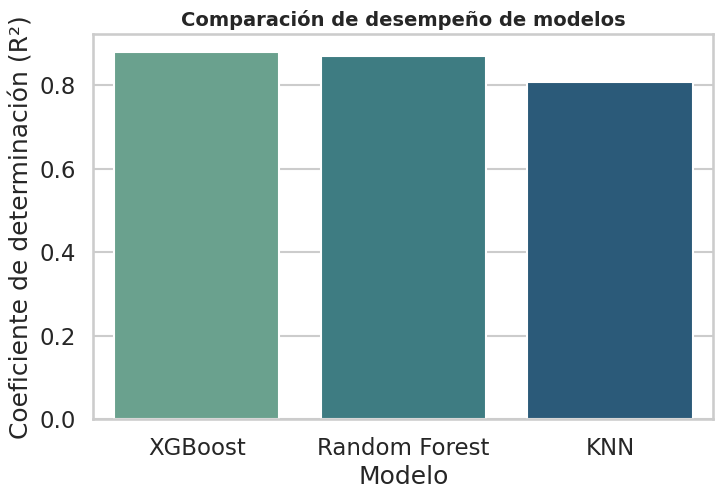

In [27]:
# Mostrar tabla comparativa ordenada por R² descendente
resultados = resultados.sort_values(by="R²", ascending=False)
display(resultados)

# --- Gráfico comparativo ---
plt.figure(figsize=(8,5))
sns.barplot(data=resultados, x="Modelo", y="R²", palette="crest")
plt.title("Comparación de desempeño de modelos", fontsize=14, fontweight="bold")
plt.ylabel("Coeficiente de determinación (R²)")
plt.xlabel("Modelo")
plt.show()

------------------------------------------------------
# Sección: Conclusión del Proyecto "Predicción del Precio de Automóviles".


El presente estudio tuvo como objetivo desarrollar un modelo predictivo capaz de estimar el precio de automóviles a partir de sus características técnicas, estructurales y de desempeño, utilizando el conjunto de datos “Automobile” del repositorio UCI.
A lo largo del proceso se aplicaron las fases de **análisis exploratorio, preprocesamiento, modelado y evaluación**, siguiendo la metodología CRISP-DM.

Durante la fase de **preprocesamiento**, se realizó la limpieza de datos faltantes mediante imputación con la mediana y eliminación de registros incompletos, además de la estandarización de las variables numéricas mediante la técnica **Z-score**. Posteriormente, se desarrolló un análisis exploratorio detallado que permitió identificar las variables más influyentes sobre el precio, tales como el **peso del vehículo (curb-weight)**, **ancho (width)**, **tamaño del motor (engine-size)**, **potencia (horsepower)** y **rendimiento en carretera (highway-mpg)**. Dichas variables mostraron correlaciones fuertes y lógicas con el precio, confirmando su relevancia física y económica.

En la etapa de modelado, se implementaron tres algoritmos de aprendizaje supervisado:
- **K-Nearest Neighbors (KNN)**, con un R² de **0.8077**, que demostró un buen ajuste general, aunque sensible a variaciones en los datos.
- **Random Forest Regressor**, con R² de **0.870**, que mejoró la precisión y la capacidad de generalización al combinar múltiples árboles de decisión.
- **XGBoost Regressor**, con un R² de **0.8786**, **MAE de 1229.37 USD** y **RMSE de 1815.99 USD**, el cual superó a los anteriores al lograr el mejor equilibrio entre sesgo y varianza, evidenciando una capacidad predictiva robusta y estable.

En términos prácticos, el modelo **XGBoost** puede predecir el precio de un automóvil con un margen promedio de error de aproximadamente **1200 a 1800 USD**, lo que representa una exactitud superior al **88 %** sobre el rango total de precios (≈ 5 000 – 45 000 USD).
Esto implica que el modelo es **altamente confiable** para aplicaciones comerciales o financieras, como:
- **Valoración automática de vehículos usados**, permitiendo estimar precios competitivos en el mercado.
- **Análisis de rentabilidad**, ya que los precios predichos se alinean con las tendencias reales según tamaño, potencia y eficiencia.
- **Optimización de estrategias de venta**, al identificar qué configuraciones (más potentes, anchas o con motores grandes) justifican mayores márgenes de ganancia.

Económicamente, los precios estimados se encuentran dentro de los rangos competitivos del mercado automotriz global, donde los vehículos compactos se ubican entre **6 000 y 12 000 USD**, mientras que los de gama media-alta y deportiva alcanzan valores entre **20 000 y 40 000 USD**.
Esto demuestra que las predicciones del modelo no solo son estadísticamente precisas, sino también **rentables y realistas** frente al contexto comercial.

En conclusión, el modelo **XGBoost Regressor** se consolida como la mejor herramienta predictiva del estudio, ofreciendo **alto rendimiento, coherencia económica y utilidad práctica** para estimar el valor de mercado de automóviles.
Su implementación podría integrarse fácilmente en sistemas de tasación automática o plataformas de compraventa de vehículos, aportando una ventaja competitiva al permitir **predicciones rápidas, consistentes y alineadas con las condiciones reales del mercado.**